XBOX GAMES Dataset

Dataset link :- https://www.kaggle.com/datasets/deepcontractor/xbox-game-pass-games-library

Problem we would be Solving 

predicting game ratings or Game_Score based on factors like TIME, RATIO, COMP %, and True_Achievement.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('raw.csv')

In [37]:
df.head()

,GAME,RATIO,GAMERS,COMP %,TIME,RATING,ADDED,True_Achievement,Game_Score
0,Mass Effect Legendary Edition,1.87,"84,143",4.1,100-120 hours,4.8,06 Jan 22,5442,2915
1,The Elder Scrolls V: Skyrim Special Edition,1.97,"213,257",8.0,80-100 hours,4.7,15 Dec 20,3055,1550
2,Mass Effect 2,1.34,"221,178",9.6,50-60 hours,4.7,09 Nov 20,1819,1355
3,Stardew Valley,3.04,"51,530",1.0,150-200 hours,4.7,02 Dec 21,3036,1000
4,It Takes Two,1.68,"71,981",15.6,12-15 hours,4.7,03 Nov 21,1678,1000


Dataset description 
1) Name of the game 
2) Ratio :- This column is made with True Achievement column and game score column
3) Number of GAMERS
4) COMP % :- Number of people that completed the game
5) TIME :- Time required for completion
6) RATING :- Rating out of 5
7) ADDED :- Date added
8) True_Achievement :- True Achievement (in game points)
9) Game_score :- Game_Score

Data Checks to perform 
1) Check Missing values 
2) Check Duplicates 
3) Check data types
4) Check the number of unique values of each column
5) Check statistics of data set
6) Check various categories present in the different categorical column 


1) Check the Missing values 

In [38]:
df.isna().sum()

GAME                 0
RATIO                0
GAMERS               0
COMP %               0
TIME                31
RATING               0
ADDED                1
True_Achievement     0
Game_Score           0
dtype: int64

As we can see, the ‘Time’ column contains 31 null values and the 'ADDED' contains 1 null value. We will replace these null values with the categorical mode of the column.

In [39]:
#Solution
df['TIME'] = df['TIME'].fillna(df['TIME'].mode()[0])
df['ADDED'] = df['ADDED'].fillna(df['ADDED'].mode()[0])


In [40]:
df.isna().sum()

GAME                0
RATIO               0
GAMERS              0
COMP %              0
TIME                0
RATING              0
ADDED               0
True_Achievement    0
Game_Score          0
dtype: int64

2) Check for Duplicates 

In [41]:
df.duplicated().sum()

np.int64(0)

3. Check for DataTypes

In [42]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME              452 non-null    object 
 1   RATIO             452 non-null    float64
 2   GAMERS            452 non-null    object 
 3   COMP %            452 non-null    float64
 4   TIME              452 non-null    object 
 5   RATING            452 non-null    float64
 6   ADDED             452 non-null    object 
 7   True_Achievement  452 non-null    int64  
 8   Game_Score        452 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 31.9+ KB


4. Checking the number of unique values of each column

In [43]:
df.nunique()

GAME                450
RATIO               292
GAMERS              451
COMP %              149
TIME                 27
RATING               29
ADDED               176
True_Achievement    434
Game_Score           84
dtype: int64

Check statistics of data set

In [44]:
df.describe()

,RATIO,COMP %,RATING,True_Achievement,Game_Score
count,452.000000,452.000000,452.000000,452.000000,452.000000
mean,3.764159,6.386947,3.701549,4717.909292,1210.132743
std,3.129151,11.605195,0.517860,5013.051958,661.961561
min,1.040000,0.000000,2.000000,252.000000,200.000000
25%,2.067500,0.600000,3.400000,2118.500000,1000.000000
50%,2.920000,1.900000,3.700000,3242.500000,1000.000000
75%,4.125000,6.150000,4.100000,5037.500000,1223.750000
max,37.180000,84.700000,4.800000,37178.000000,7000.000000


Statisctical Insights
1) the Average Game score on Xbox Games library is 1210.132743
2) the median True_Achievement score is 3242.50, which is lower than the mean, indicating a right-skewed distribution.
3) Game_Score ranges from 200 to 7000, showing significant variation.
4) The minimum rating is 2.00, and the maximum is 4.80.

In [45]:
# Highest-rated game
max_rating = df['RATING'].max() 
highest_rated_game = df[df['RATING'] == max_rating]  

# Lowest-rated game
min_rating = df['RATING'].min()  
lowest_rated_game = df[df['RATING'] == min_rating]  

# Display the results
print("Highest-rated Game(s):")
print(highest_rated_game[['GAME', 'RATING']])

print("\nLowest-rated Game(s):")
print(lowest_rated_game[['GAME', 'RATING']])

Highest-rated Game(s):
                            GAME  RATING
0  Mass Effect Legendary Edition     4.8

Lowest-rated Game(s):
                    GAME  RATING
418  Surgeon Simulator 2     2.0


In [46]:
# Highest Game Score
max_game_score = df['Game_Score'].max()  
highest_game_score = df[df['Game_Score'] == max_game_score]  

# Lowest Game Score
min_game_score = df['Game_Score'].min()  
lowest_game_score = df[df['Game_Score'] == min_game_score]  

# Display the results
print("Highest Game Score(s):")
print(highest_game_score[['GAME', 'TIME']])

print("\nLowest Game Score(s):")
print(lowest_game_score[['GAME', 'TIME']])


Highest Game Score(s):
                                 GAME           TIME
15  Halo: The Master Chief Collection  300-500 hours

Lowest Game Score(s):
                                     GAME           TIME
68                          Banjo-Kazooie    12-15 hours
102                           Banjo-Tooie    15-20 hours
114                    Plants vs. Zombies    15-20 hours
138                      Battlefield 1943    20-25 hours
190        Alan Wake's American Nightmare     8-10 hours
201               Perfect Dark (Xbox 360)    50-60 hours
260                           Bejeweled 3    12-15 hours
354  Feeding Frenzy 2: Shipwreck Showdown     8-10 hours
359                        Joy Ride Turbo     8-10 hours
367                          Heavy Weapon     8-10 hours
374                                  Zuma    50-60 hours
388                           Bejeweled 2  300-500 hours
395                        Feeding Frenzy    10-12 hours
399                      Jetpac Refuelled    10-12

if feature for feature in the data frame column is not equal to object type then its a nemurical feature 
else for feature equal to object data types its a categorical feature 

In [47]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['RATIO', 'COMP %', 'RATING', 'True_Achievement', 'Game_Score']

We have 4 categorical features : ['GAME', 'GAMERS', 'TIME', 'ADDED']


In [48]:

# converting time into numerical data type 
def convert_time_to_numeric(time_str):
    # Handle '1000+ hours' by returning 1000 
    if '1000+' in time_str:
        return 1000
    # ranges like '100-120 hours'
    elif '-' in time_str:
        range_values = time_str.split('-')
        return (float(range_values[0]) + float(range_values[1].split()[0])) / 2
    # Handle fractional times like '0.5 hours'
    elif 'hours' in time_str and '.' in time_str:
        return float(time_str.split()[0])
    # Handle single integer times like '12 hours'
    elif 'hours' in time_str:
        return float(time_str.split()[0])
    # If format is not recognizable, return NaN
    else:
        return np.nan

df['TIME'] = df['TIME'].apply(convert_time_to_numeric)


In [49]:
# Highest Game Score
max_game_score = df['TIME'].max()  
highest_game_score = df[df['TIME'] == max_game_score]  

# Lowest Game Score
min_game_score = df['TIME'].min()  
lowest_game_score = df[df['TIME'] == min_game_score] 

# Display the results
print("Highest Game Score(s):")
print(highest_game_score[['GAME', 'Game_Score']])

print("\nLowest Game Score(s):")
print(lowest_game_score[['GAME', 'Game_Score']])

Highest Game Score(s):
                           GAME  Game_Score
26               Gears of War 3        2000
37   Microsoft Flight Simulator        1000
109                     Gears 5        2500
180    The Elder Scrolls Online        5480
214              Sea of Thieves        3800

Lowest Game Score(s):
           GAME  Game_Score
380  Townscaper        1000


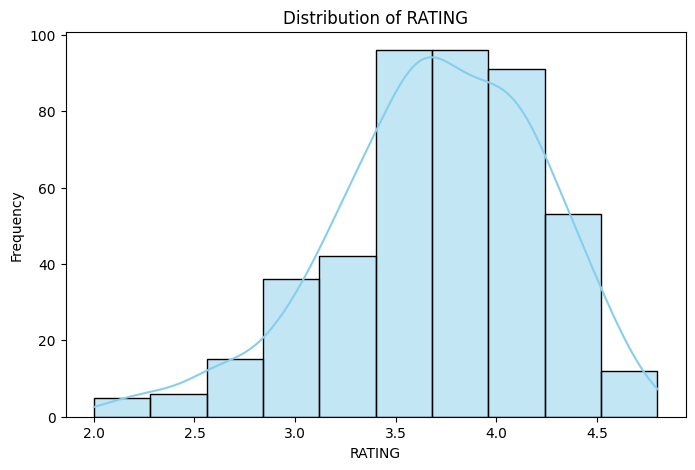

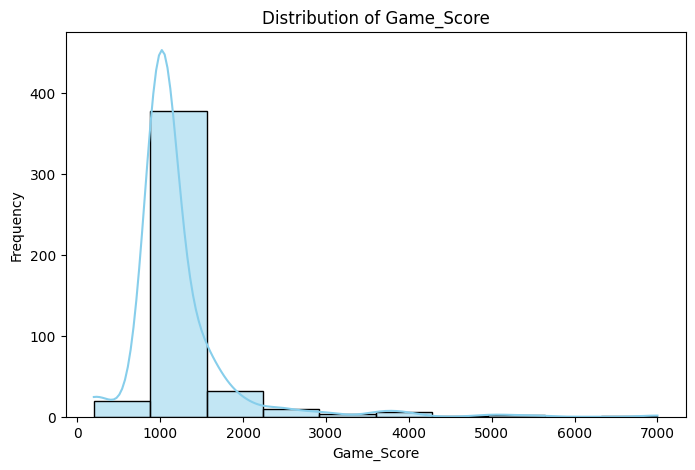

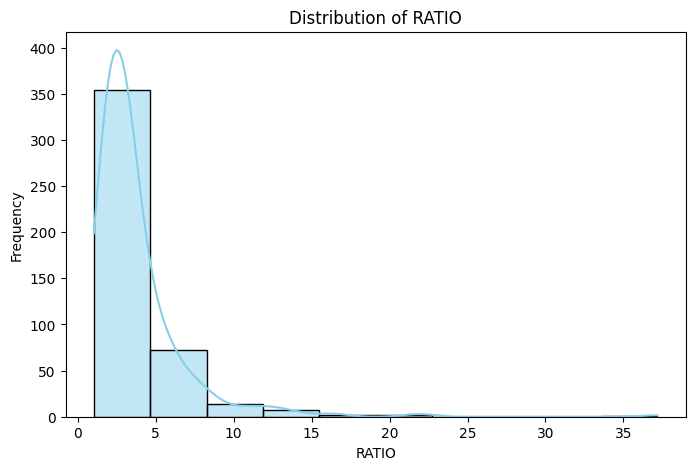

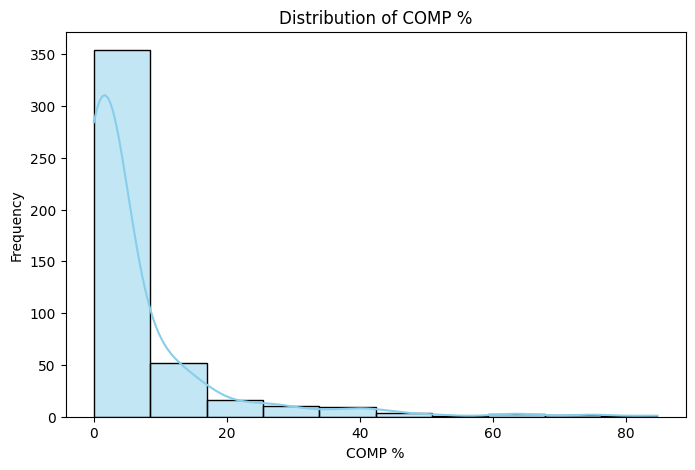

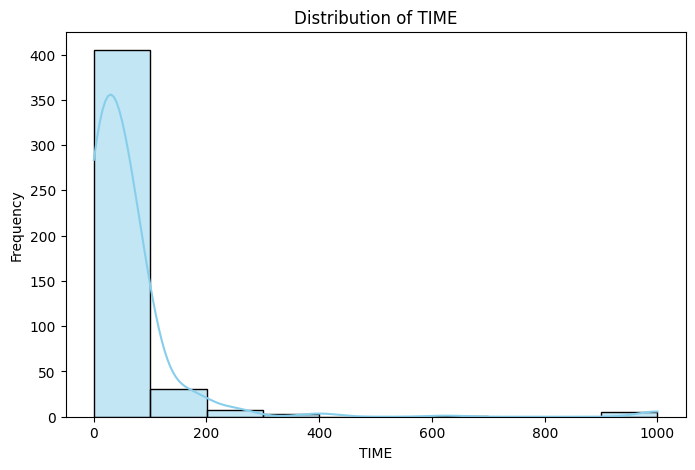

In [50]:
# Plot Histograms with KDE for RATING, Game_Score, RATIO, COMP %, TIME
variables = ['RATING', 'Game_Score', 'RATIO', 'COMP %', 'TIME']

for var in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True, color='skyblue', bins=10)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

Feature Engineering: Detailed Explanation

A. Time Categories

In [51]:
# Define time categories based on completion hours
def categorize_time(time):
    if time <= 20:
        return 'short'
    elif 20 < time <= 60:
        return 'medium'
    elif 60 < time <= 150:
        return 'long'
    else:
        return 'very long'

df['Time_Category'] = df['TIME'].apply(categorize_time)

print(df[['TIME', 'Time_Category']])


      TIME Time_Category
0    110.0          long
1     90.0          long
2     55.0        medium
3    175.0     very long
4     13.5         short
..     ...           ...
447   17.5         short
448   70.0          long
449   70.0          long
450   17.5         short
451   70.0          long

[452 rows x 2 columns]


This creates a new feature, Time_Category, that divides games into "short", "medium", "long", and "very long" based on the game's completion time.

B. Difficulty Groups (Based on RATIO)

In [52]:
# Define difficulty categories based on the 'RATIO'
def categorize_difficulty(ratio):
    if ratio <= 1.5:
        return 'easy'
    elif 1.5 < ratio <= 2.0:
        return 'medium'
    else:
        return 'hard'

df['Difficulty_Level'] = df['RATIO'].apply(categorize_difficulty)

print(df[['RATIO', 'Difficulty_Level']])


     RATIO Difficulty_Level
0     1.87           medium
1     1.97           medium
2     1.34             easy
3     3.04             hard
4     1.68           medium
..     ...              ...
447   2.40             hard
448  11.70             hard
449   2.90             hard
450   3.91             hard
451   1.61           medium

[452 rows x 2 columns]


C. Competition Levels (Based on COMP %)

In [53]:
# Define competition levels based on 'COMP %'
def categorize_competition(comp):
    if comp <= 5:
        return 'low'
    elif 5 < comp <= 10:
        return 'medium'
    else:
        return 'high'

df['Competition_Level'] = df['COMP %'].apply(categorize_competition)

print(df[['COMP %', 'Competition_Level']])


     COMP % Competition_Level
0       4.1               low
1       8.0            medium
2       9.6            medium
3       1.0               low
4      15.6              high
..      ...               ...
447     1.0               low
448     0.0               low
449     1.9               low
450     1.6               low
451    12.1              high

[452 rows x 2 columns]
